In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\FYP\\retail-dataset.csv",encoding='latin1')

# Initial Data Exploration

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
print("Shape of data: " + str(df.shape))

Shape of data: (541909, 8)


In [5]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [8]:
print("Missing values: ")
print(round(100*(df.isnull().sum())/len(df),2))

Missing values: 
InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64


# Data cleansing

In [9]:
df = df.dropna()
df = df.reset_index(drop=True)

In [10]:
print("Missing values: ")
print(round(100*(df.isnull().sum())/len(df),2))

Missing values: 
InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64


In [11]:
df = df[(df['Quantity']>0)]
df = df[(df['UnitPrice']>0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


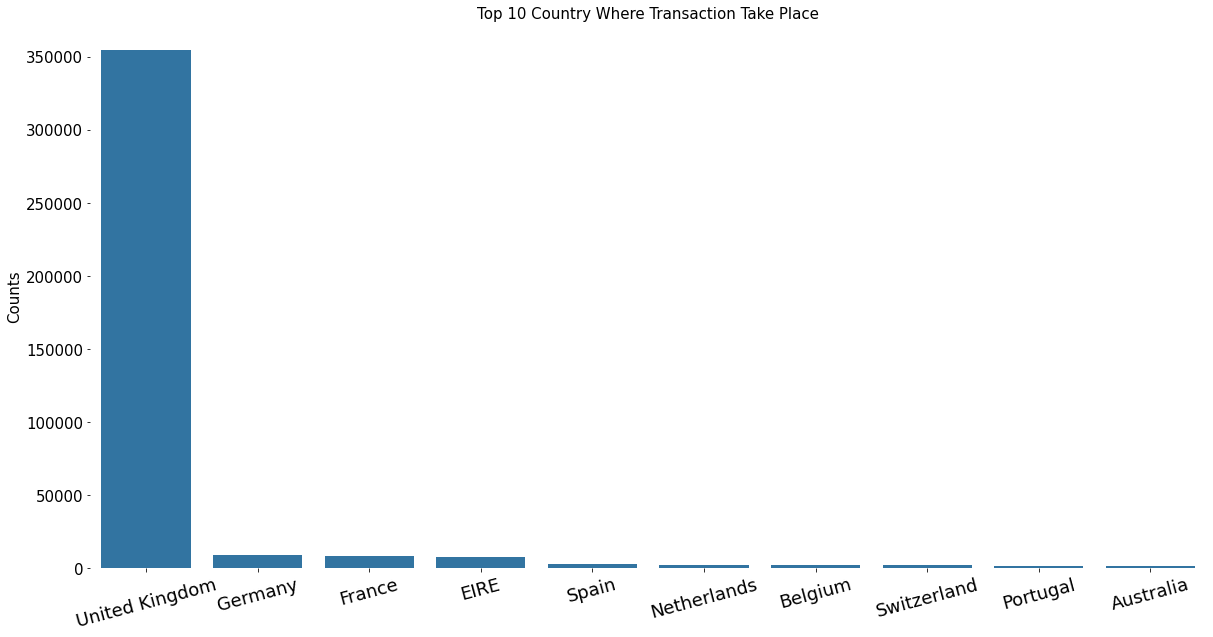

In [12]:
countries = df['Country'].value_counts().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(20,10))

sns.barplot(countries.index, countries.values, color='tab:blue')
plt.ylabel("Counts", fontsize = 15)
plt.title("Top 10 Country Where Transaction Take Place", fontsize= 15)
plt.xticks(rotation=15, fontsize = 18)
plt.yticks(fontsize = 15)
sns.despine(left=True, bottom=True)

plt.show()

# Data Transformation

In [13]:
df = df.query("Country == 'United Kingdom'").reset_index(drop=True)
df.Country.describe()

count             354321
unique                 1
top       United Kingdom
freq              354321
Name: Country, dtype: object

In [14]:
df['CustomerID'] = df['CustomerID'].astype(str)
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [15]:
df['Date'] = pd.to_datetime(df['InvoiceDate'])
df['Date'] = df['Date'].dt.date
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [16]:
today = df['Date'].max()
today


datetime.date(2011, 12, 9)

In [17]:
df['daysAgo'] = today - df['Date']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,daysAgo
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,373 days
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,373 days
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,373 days
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,373 days
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,373 days


In [18]:
df['Monetary'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,daysAgo,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,373 days,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,373 days,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,373 days,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,373 days,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,373 days,20.34


In [19]:
rfm_r = df.groupby('CustomerID')['daysAgo'].min()
rfm_r = rfm_r.reset_index() 
rfm_r.head()

,CustomerID,daysAgo
0,12346.0,325 days
1,12747.0,2 days
2,12748.0,0 days
3,12749.0,3 days
4,12820.0,3 days


In [20]:
rfm_r['daysAgo'] = rfm_r['daysAgo'].dt.days
rfm_r.head()

,CustomerID,daysAgo
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [21]:
rfm_m = df.groupby('CustomerID')['Monetary'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34


In [22]:
rfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CustomerID', 'Frequency']
rfm_f.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4595
3,12749.0,199
4,12820.0,59


In [23]:
rfm = pd.merge(rfm_r, rfm_f, on='CustomerID', how='inner')
rfm.columns = ['CustomerID','Recency','Frequency']
rfm.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12747.0,2,103
2,12748.0,0,4595
3,12749.0,3,199
4,12820.0,3,59


In [24]:
rfm = pd.merge(rfm, rfm_m, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4595,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


# Detecting Outliers

Text(0.5, 0, 'Variables')

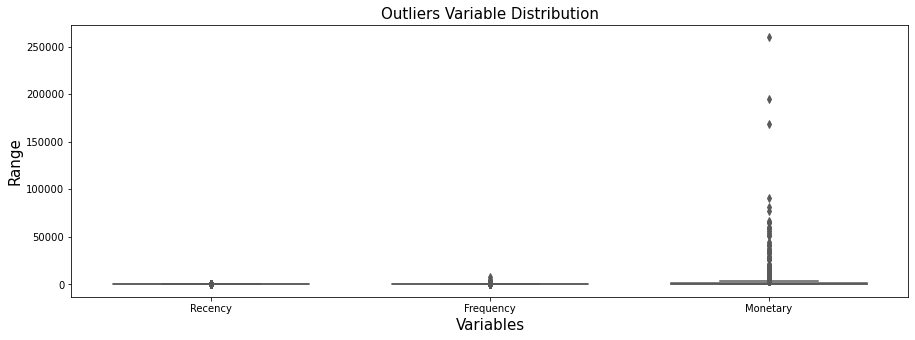

In [25]:
outliers = ['Recency','Frequency','Monetary']
plt.figure(figsize=(15,5))
sns.boxplot(data = rfm[outliers], palette="Set2" ,whis=1.5, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 15)
plt.ylabel("Range", fontsize=15)
plt.xlabel("Variables", fontsize=15)

In [26]:
for x in ['Monetary']:
    q75,q25 = np.percentile(rfm.loc[:,x],[75,25])
    IQRange = q75-q25
 
    max = q75+(1.5*IQRange)
    min = q25-(1.5*IQRange)
 
    rfm.loc[rfm[x] < min,x] = np.nan
    rfm.loc[rfm[x] > max,x] = np.nan
    
for x in ['Recency']:
    q75,q25 = np.percentile(rfm.loc[:,x],[75,25])
    IQRange = q75-q25
 
    max = q75+(1.5*IQRange)
    min = q25-(1.5*IQRange)
 
    rfm.loc[rfm[x] < min,x] = np.nan
    rfm.loc[rfm[x] > max,x] = np.nan

for x in ['Frequency']:
    q75,q25 = np.percentile(rfm.loc[:,x],[75,25])
    IQRange = q75-q25
 
    max = q75+(1.5*IQRange)
    min = q25-(1.5*IQRange)
 
    rfm.loc[rfm[x] < min,x] = np.nan
    rfm.loc[rfm[x] > max,x] = np.nan

In [27]:
print(round(100*(rfm.isnull().sum())/len(df),2))

CustomerID    0.00
Recency       0.04
Frequency     0.10
Monetary      0.11
dtype: float64


In [28]:
rfm = rfm.dropna()
print(round(100*(rfm.isnull().sum())/len(df),2))

CustomerID    0.0
Recency       0.0
Frequency     0.0
Monetary      0.0
dtype: float64


Text(0.5, 0, 'Variables')

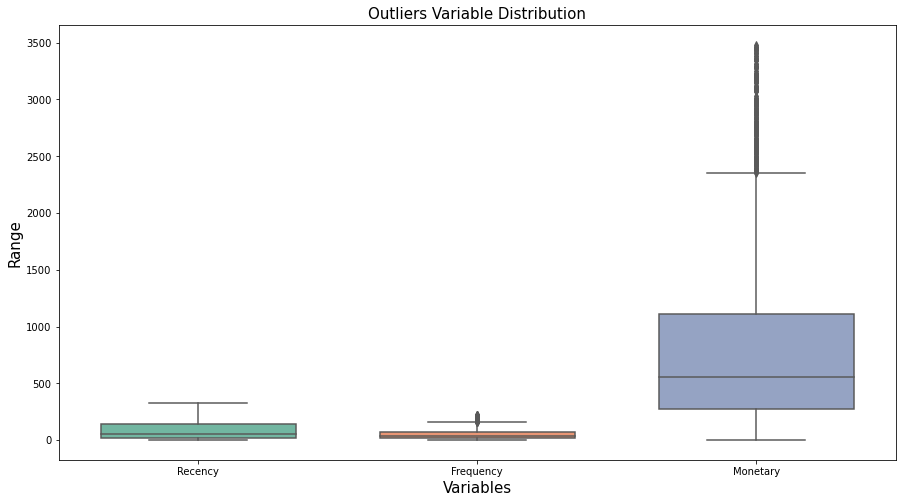

In [29]:
outliers = ['Recency','Frequency','Monetary']
plt.figure(figsize=(15,8))
sns.boxplot(data = rfm[outliers], palette="Set2" ,whis=1.5, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 15)
plt.ylabel("Range", fontsize=15)
plt.xlabel("Variables", fontsize=15)

In [30]:
median = np.median(rfm['Recency'])
upper_quartile = np.percentile(rfm['Recency'], 75)
lower_quartile = np.percentile(rfm['Recency'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = rfm['Recency'][rfm['Recency']<=upper_quartile+1.5*iqr].max()
lower_whisker = rfm['Recency'][rfm['Recency']>=lower_quartile-1.5*iqr].min()

print('Statistic for Recency variable\n')
print('Median of Recency:', median)
print('Upper Bound of Recency:', upper_whisker)
print('Lower Bound of Recency:', lower_whisker)
print('Inter-Quartile Range of Recency:', iqr)

print('=========================================\n')

median = np.median(rfm['Frequency'])
upper_quartile = np.percentile(rfm['Frequency'], 75)
lower_quartile = np.percentile(rfm['Frequency'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = rfm['Frequency'][rfm['Frequency']<=upper_quartile+1.5*iqr].max()
lower_whisker = rfm['Frequency'][rfm['Frequency']>=lower_quartile-1.5*iqr].min()

print('Statistic for Frequency variable\n')
print('Median of Frequency:', median)
print('Upper Bound of Frequency:', upper_whisker)
print('Lower Bound of Frequency:', lower_whisker)
print('Inter-Quartile Range of Frequency:', iqr)

print('=========================================\n')

median = np.median(rfm['Monetary'])
upper_quartile = np.percentile(rfm['Monetary'], 75)
lower_quartile = np.percentile(rfm['Monetary'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = rfm['Monetary'][rfm['Monetary']<=upper_quartile+1.5*iqr].max()
lower_whisker = rfm['Monetary'][rfm['Monetary']>=lower_quartile-1.5*iqr].min()

print('Statistic for Monetary variable\n')
print('Median of Monetary:', median)
print('Upper Bound of Monetary:', upper_whisker)
print('Lower Bound of Monetary:', lower_whisker)
print('Inter-Quartile Range of Recency:', iqr)

Statistic for Recency variable

Median of Recency: 57.0
Upper Bound of Recency: 329.0
Lower Bound of Recency: 0.0
Inter-Quartile Range of Recency: 123.0

Statistic for Frequency variable

Median of Frequency: 34.0
Upper Bound of Frequency: 160.0
Lower Bound of Frequency: 1.0
Inter-Quartile Range of Frequency: 58.5

Statistic for Monetary variable

Median of Monetary: 551.04
Upper Bound of Monetary: 2352.53
Lower Bound of Monetary: 3.75
Inter-Quartile Range of Recency: 831.7500000000001


In [31]:
rfm_df = rfm[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()

rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(3267, 3)

In [32]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,-0.992175,0.168036,0.177881
1,1.370788,-0.943035,-0.966696
2,-0.241850,-0.104491,0.186692
3,-0.197055,-0.963999,1.278729
4,-0.365038,-0.544726,-0.556619


# VISUALIZATION

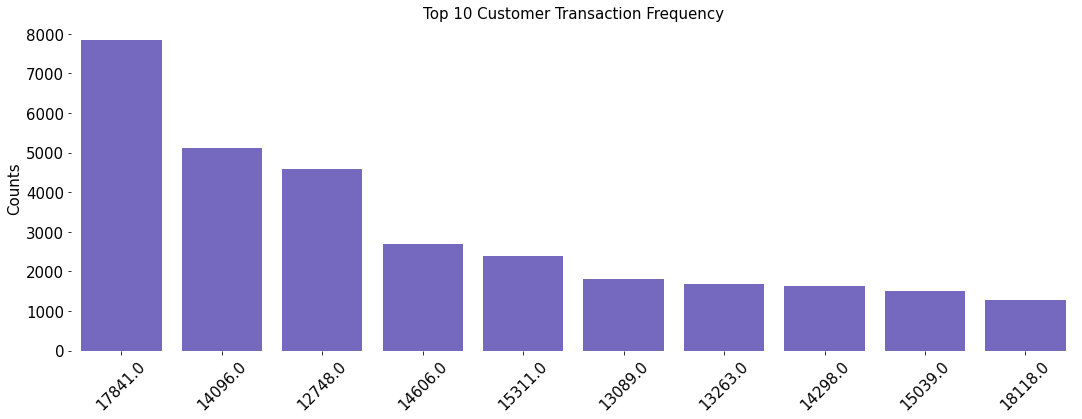

most frequency:  7847
Top 10 least frequency:  1279
least frequency:  1


In [33]:
customers = df['CustomerID'].value_counts()
plt.figure(figsize=(18,6))

sns.barplot(x=customers[:10].index, y=customers[:10].values, color='slateblue')
plt.ylabel("Counts", fontsize = 15)
plt.title("Top 10 Customer Transaction Frequency", fontsize = 15)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=45)
plt.show()

print('most frequency: ',customers[:10].max())
print('Top 10 least frequency: ',customers[:10].min())
print('least frequency: ',customers.min())

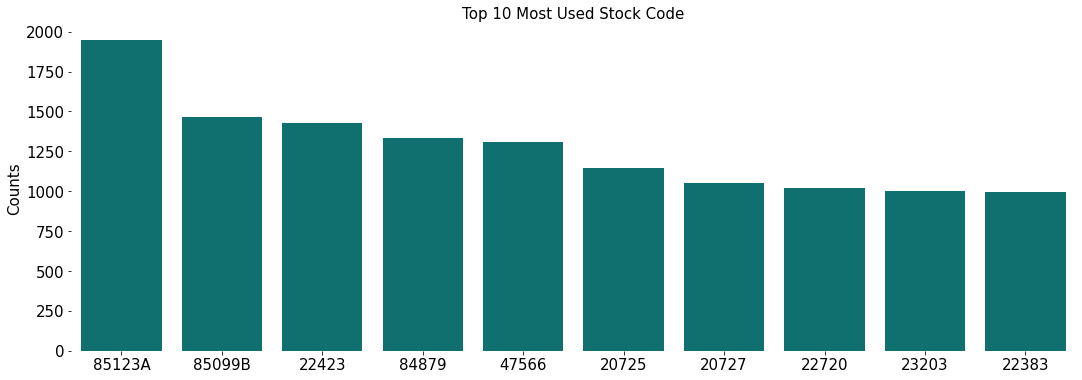

most frequency:  1947
Top 10 least frequency:  996
least frequency:  1


In [34]:
stockcodes = df['StockCode'].value_counts()
plt.figure(figsize=(18,6))
sns.barplot(x=stockcodes[:10].index, y=stockcodes[:10].values, color='teal')
plt.ylabel("Counts",fontsize=15)
plt.title("Top 10 Most Used Stock Code", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.despine(left=True, bottom=True)
plt.show()


print('most frequency: ',stockcodes[:10].max())
print('Top 10 least frequency: ',stockcodes[:10].min())
print('least frequency: ',stockcodes.min())

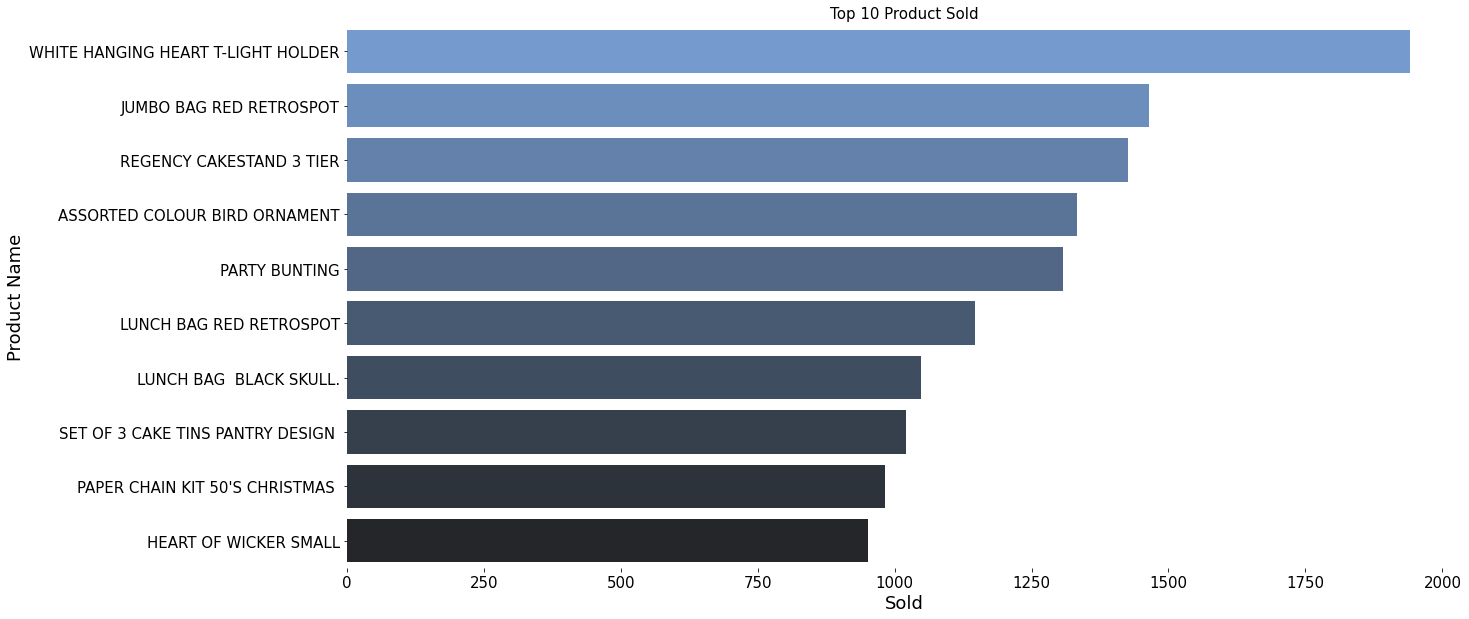

most frequency:  1940
Top 10 least frequency:  952
least frequency:  1


In [35]:
items = df['Description'].value_counts()
plt.figure(figsize=(20,10))
sns.barplot(y=items[:10].index,x=items[:10].values, palette=sns.dark_palette("#69d",10, reverse=True))

plt.ylabel('Product Name', fontsize=18)
plt.xlabel('Sold', fontsize=18)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Top 10 Product Sold',fontsize=15, )

sns.despine(left=True, bottom=True)

plt.show()




print('most frequency: ',items.max())
print('Top 10 least frequency: ',items[:10].min())
print('least frequency: ',items.min())

least frequency:  175
most frequency:  3246
average:  1161.7081967213114


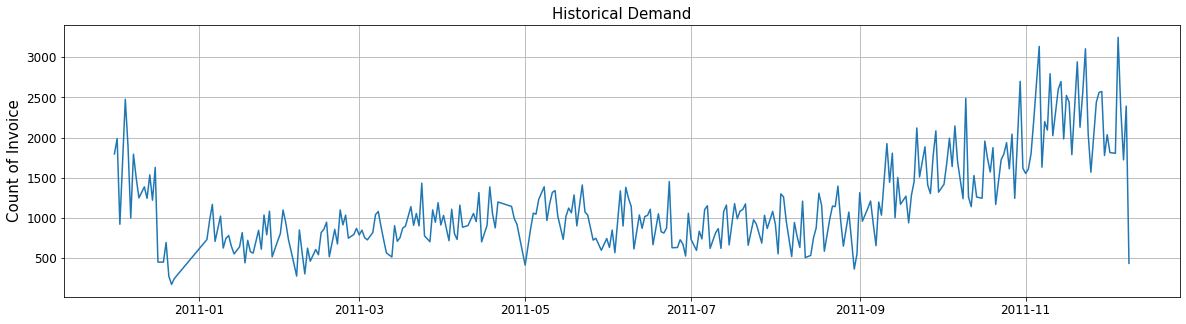

In [36]:
demands = df.groupby('Date')['InvoiceNo'].count()

plt.figure(figsize=(20,5))
plt.title('Historical Demand', fontsize=15)
plt.ylabel("Count of Invoice", fontsize=15)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.grid(True)

plt.plot(demands)

print('least frequency: ',df.groupby('Date')['InvoiceNo'].count().min())
print('most frequency: ',df.groupby('Date')['InvoiceNo'].count().max())
print('average: ',df.groupby('Date')['InvoiceNo'].count().mean())

# MODEL BUILDING

In [38]:
kmeans = KMeans(n_clusters=4, max_iter=100)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=100, n_clusters=4)

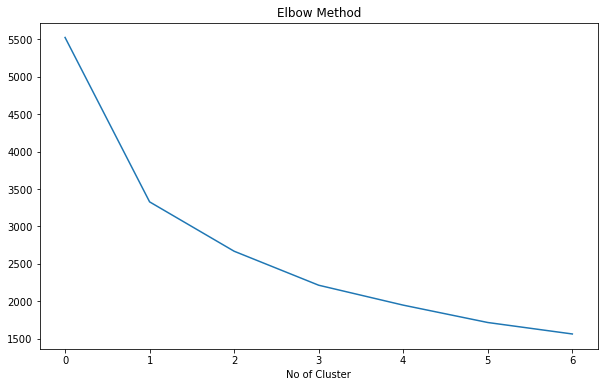

In [39]:
elbow = []
n_of_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in n_of_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(rfm_df_scaled)
    
    elbow.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.title("Elbow Method")

plt.plot(elbow)
plt.xlabel('No of Cluster')
plt.show()


In [51]:
n_of_clusters = [2, 3, 4, 5, 6, 7, 8]

for clusters in n_of_clusters:
    kmeans = KMeans(n_clusters=clusters, max_iter=100)
    kmeans.fit(rfm_df_scaled)
    cluster_labels = kmeans.labels_
    silhouetteScore = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters =", clusters, "The average silhouette_score is :", silhouetteScore)

For n_clusters = 2 The average silhouette_score is : 0.4265978111360105
For n_clusters = 3 The average silhouette_score is : 0.44568872665851134
For n_clusters = 4 The average silhouette_score is : 0.402395308603845
For n_clusters = 5 The average silhouette_score is : 0.4161080795698667
For n_clusters = 6 The average silhouette_score is : 0.3679289393211051
For n_clusters = 7 The average silhouette_score is : 0.34049148767877296
For n_clusters = 8 The average silhouette_score is : 0.3484043815771222


# FINAL MODEL BUILDING

In [42]:
kmeans = KMeans(n_clusters=3, max_iter=100)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=100, n_clusters=3)

In [43]:
rfm['ClusterNo'] = kmeans.labels_
rfm.head()

,CustomerID,Recency,Frequency,Monetary,ClusterNo
4,12820.0,3.0,59.0,942.34,1
5,12821.0,214.0,6.0,92.72,0
6,12822.0,70.0,46.0,948.88,1
7,12823.0,74.0,5.0,1759.50,1
8,12824.0,59.0,25.0,397.12,1


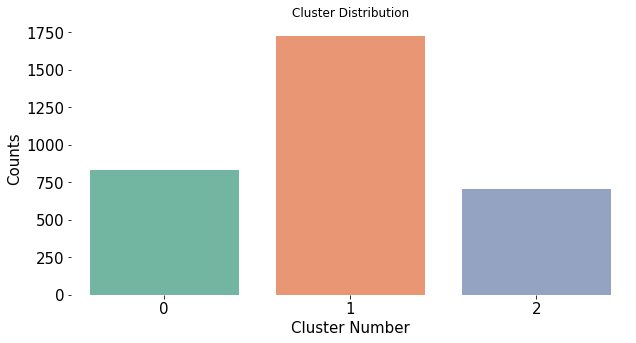

Proportion of cluster 0 = 25.46678910315274
Proportion of cluster 1 = 52.861952861952865
Proportion of cluster 2 = 21.671258034894397


In [44]:
clusters=rfm['ClusterNo'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=clusters.index,y=clusters.values, palette=sns.color_palette("Set2"))

plt.ylabel('Counts', fontsize=15)
plt.xlabel('Cluster Number', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.title('Cluster Distribution')
sns.despine(left=True, bottom=True)
plt.show()

print('Proportion of cluster 0 =',((rfm[rfm['ClusterNo']==0].shape[0])/rfm.shape[0])*100)
print('Proportion of cluster 1 =',((rfm[rfm['ClusterNo']==1].shape[0])/rfm.shape[0])*100)
print('Proportion of cluster 2 =',((rfm[rfm['ClusterNo']==2].shape[0])/rfm.shape[0])*100)

In [45]:
mean = rfm.groupby(['ClusterNo'])[['Recency', 'Frequency', 'Monetary']].mean()
mean

,Recency,Frequency,Monetary
ClusterNo,,,
0,226.052885,23.766827,373.205529
1,47.911407,35.149971,581.878890
2,40.148305,121.593220,1881.121484


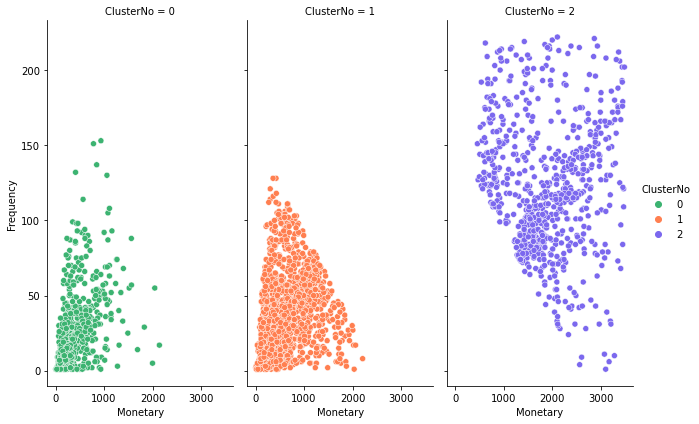

In [46]:
sns.relplot(x='Monetary', y='Frequency', hue='ClusterNo', col='ClusterNo', 
            palette=["mediumseagreen","coral","mediumslateblue"], height=6, aspect=0.5, data=rfm)
#sns.set(rc={'figure.figsize':(11,5)})

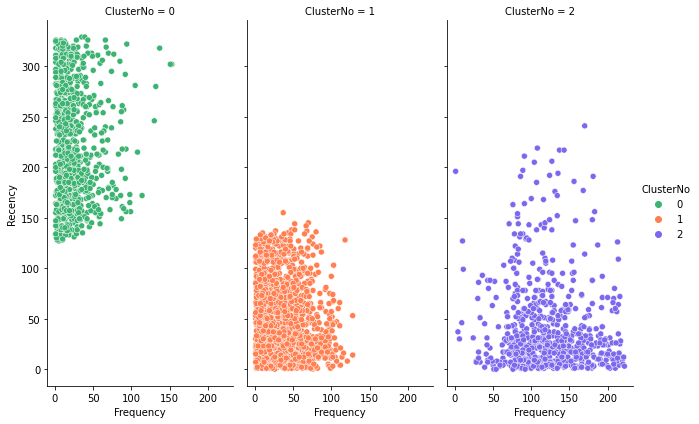

In [47]:
sns.relplot(x='Frequency', y='Recency', hue='ClusterNo', col='ClusterNo', 
            palette=["mediumseagreen","coral","mediumslateblue"], height=6, aspect=0.5, data=rfm)